In [36]:
import os
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import pickle 

from datetime import datetime
from statistics import mean, stdev

from sklearn.model_selection import train_test_split

from sklearn import metrics 
import matplotlib.pyplot as plt


def make_dir(new_dir):
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    return "made dir " + str(new_dir)

def merge_dicts(dict1, dict2):
    res = {**dict1, **dict2}
    return res

def merge_list_of_dicts(list):
    null_dict= {}
    for dict in list:
        null_dict= merge_dicts(null_dict, dict)
    return null_dict

storage= "d:\\Research\\analyze_embeddings\\" #source folder
sound_data= storage+ "sound_data\\" #location of sound files
wd= "D:\\github\\man-vs-BirdNet-summer-2024-\\embeddings"
common_resources= wd+ "\\common_resources\\"
dir= common_resources+ "store_embeddings_dict\\"
conf=0.25

os.chdir(dir)
list_of_dicts= glob.glob("*.pickle")
array_of_dicts=[]
for dicts in list_of_dicts:
    with open(dicts, 'rb') as f:
        dictionary = pickle.load(f)
    array_of_dicts.append(dictionary)

merged_dictionary= merge_list_of_dicts(array_of_dicts)

os.chdir(common_resources)
with open("y_arr.pickle", 'rb') as f:
    y_dictionary = pickle.load(f)
with open("loclabels.pickle", 'rb') as f:
    labels_dictionary = pickle.load(f)

subset_merged_dict= {i:merged_dictionary[i] for i in list(y_dictionary.keys()) if i in merged_dictionary}
subset_y_dict= {i: y_dictionary[i] for i in list(subset_merged_dict.keys()) if i in y_dictionary}
subset_labels_dict= {i:labels_dictionary[i] for i in list(subset_merged_dict.keys()) if i in labels_dictionary}
x= list(subset_merged_dict.values())
x= [list(i) for i in x]
y= list(subset_y_dict.values())
y= [list(i) for i in y]
groups= list(subset_labels_dict.values())

def compare_array(array1, array2):
    tp=0 
    fp=0
    fn=0
    tn=0
    for i in range(len(array1)):
        if array1[i]==1 and array2[i]==1:
            tp+=1
        elif array1[i]==0 and array2[i]==1:
            fp+=1
        elif array1[i]==1 and array2[i]==0:
            fn+=1
        else:
            tn+=1
    return tp,fp,fn,tn

def score_list_of_arrays(list1, list2):
    tp_total, fp_total, fn_total, tn_total= 0,0,0,0
    for i in range(len(list1)):
        tp, fp,fn,tn = compare_array(list1[i],list2[i])
        tp_total+=tp
        fp_total+=fp
        fn_total+=fn
        tn_total+=tn
    recall= tp_total/ (tp_total+fn_total)
    if (tp_total+fp_total) == 0:
        precision=0
        print("ERROR DENOM ZERO")
    else:
        precision= tp_total/(tp_total+fp_total)
        f1_score= (precision*recall)/ (precision+recall)
    return precision, recall, f1_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import ClassifierChain
base_clf= MultinomialNB()
clf= ClassifierChain(base_clf, order='random', random_state=42)
clf.fit(X_train, y_train)

ClassifierChain(base_estimator=MultinomialNB(), order='random', random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_jobs=4, n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=4)

In [28]:
array= clf.predict(X_test)
array[0]

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [31]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train) 
print(score_list_of_arrays(y_test, y_pred))
print(score_list_of_arrays(y_train, y_train_pred))

0.0011185682326621924
0.0004798464491362764
(0.24786878169850005, 0.5431544100260108, 0.1701985773562537)
(0.24469326877350742, 0.5847711540448394, 0.17250838159097837)


In [35]:
y_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train) 
print(score_list_of_arrays(y_test, y_pred))
print(score_list_of_arrays(y_train, y_train_pred))

(0.6889655172413793, 0.2362260581697801, 0.17591125198098256)
(1.0, 1.0, 0.5)


0.645748987854251 0.9995706311721769
0.6717770034843206 0.9997901804448175
0.6686909581646424 1.0
0.6773074253990284 1.0
0.6755430974071479 0.9998965766883856
0.6760660247592847 1.0
0.6775766016713092 1.0
0.6810996563573883 1.0
0.6865051903114187 1.0
0.6852367688022284 1.0
0.6819444444444445 1.0
0.6837725381414702 1.0
0.6854783207157605 1.0
0.6839557399723375 1.0
0.6804333107650643 1.0
0.6880607315389924 1.0
0.6824611032531824 1.0
0.6850715746421268 1.0


Text(0.5, 0, 'n_est')

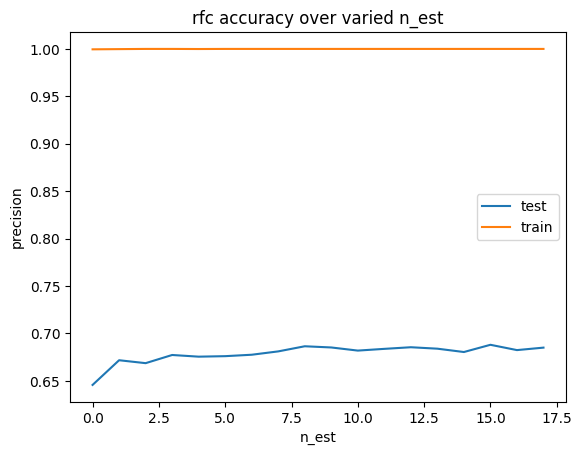

In [41]:
rfc_prec_arr_over_n_est= []
rfc_prec_arr_over_n_est_train= []
for i in range(20, 200, 10):
    rfc= RandomForestClassifier(n_jobs=4, n_estimators=i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    y_train_pred = rfc.predict(X_train) 
    score= score_list_of_arrays(y_test, y_pred)[0]
    score2= score_list_of_arrays(y_train, y_train_pred)[0]
    print(score, score2)
    rfc_prec_arr_over_n_est.append(score)
    rfc_prec_arr_over_n_est_train.append(score2)
plt.plot(rfc_prec_arr_over_n_est, label="test")
plt.plot(rfc_prec_arr_over_n_est_train, label="train")
plt.legend()
plt.title("rfc accuracy over varied n_est")
plt.ylabel("precision")
plt.xlabel("n_est")

0.6700236966824644 0.7365016173177408
0.6566362170875873 0.7142535971223022
0.6684619988031119 0.7309348872561439
0.6556655665566556 0.7179725645198791
0.6748617086662569 0.7319027921406411
0.6572535991140642 0.714896650035638
0.672 0.7282722513089005
0.656896551724138 0.7134899491402277
0.6745932415519399 0.7268123667377399
0.6560877091748413 0.7102342786683107
0.6708780795957043 0.7261872455902306
0.6576629477392836 0.7109768378650554
0.6679316888045541 0.7257096069868996
0.6553973902728352 0.7114263997973144
0.6711281070745698 0.7218707015130674
0.6604901374775852 0.7116722494202525
0.6645161290322581 0.72
0.660217654171705 0.7082573586871581
0.673164392462638 0.7163841807909604
0.6644295302013423 0.7003146303093865


Text(0.5, 0, 'n_neighbours')

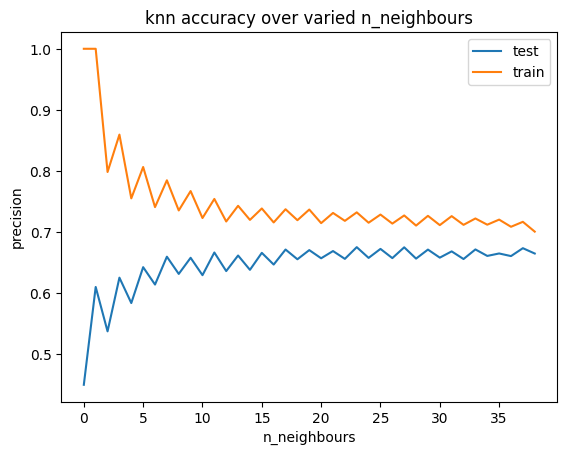

In [43]:
from sklearn.neighbors import KNeighborsClassifier
# rfc_prec_arr_over_n_est= []
# rfc_prec_arr_over_n_est_train= []
for i in range(20, 40, 1):
    rfc= KNeighborsClassifier(n_jobs=4, n_neighbors=i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    y_train_pred = rfc.predict(X_train) 
    score= score_list_of_arrays(y_test, y_pred)[0]
    score2= score_list_of_arrays(y_train, y_train_pred)[0]
    print(score, score2)
    rfc_prec_arr_over_n_est.append(score)
    rfc_prec_arr_over_n_est_train.append(score2)
plt.plot(rfc_prec_arr_over_n_est, label="test")
plt.plot(rfc_prec_arr_over_n_est_train, label="train")
plt.legend()
plt.title("knn accuracy over varied n_neighbours")
plt.ylabel("precision")
plt.xlabel("n_neighbours")

In [45]:
a= ["h", "s"]
if "h" in a:
    print("a")

a
